<a href="https://colab.research.google.com/github/viktory-41/rosnich_kompany_velikobrit/blob/main/onl_rozn_velicobr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RFM-анализ клиентов интернет-магазина (Online Retail)

**Автор:** Виктория
**Дата:** Февраль 2026
**Описание:** Анализ клиентской базы британского интернет-магазина с помощью RFM-сегментации.
Цель — выделить группы клиентов для персонализированных маркетинговых стратегий.

**Датасет:** Online Retail из репозитория UCI

Это набор транзакционных данных, содержащий все транзакции, совершенные в период с 01.12.2010 по 09.12.2011 зарегистрированной в Великобритании онлайн-розничной компанией, не имеющей розничных магазинов.  Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании — оптовые торговцы. https://archive.ics.uci.edu/dataset/352/online+retail

InvoiceNo: Номер счета-фактуры. Номинальный, 6-значный целочисленный номер, уникально присваиваемый каждой транзакции. Если этот код начинается с буквы «с», это означает аннулирование. StockCode: Код товара (наименования). Номинальный, 5-значный целочисленный номер, уникально присваиваемый каждому отдельному товару. Description: Название товара (наименования). Номинальный. Quantity: Количество каждого товара (наименования) в одной транзакции. Числовое значение. InvoiceDate: Дата и время выставления счета. Числовое значение, день и время создания каждой транзакции. UnitPrice: Цена за единицу. Числовое значение, цена товара за единицу в фунтах стерлингов. CustomerID: Номер клиента. Номинальный, 5-значный целочисленный номер, уникально присваиваемый каждому клиенту. Country: Название страны. Номинальное значение, название страны, в которой проживает каждый клиент.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_excel('/content/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
df.shape

(541909, 8)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Мы видим, что у нас имеется 8 признаков, из которых 4 категориальных, 1 целочисленный, 2  вещественных и 1 временной

In [22]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Заметим, что для CustomerID имеются пустые ячейки, скорее всего это не зарегистрированные пользователи. Рассмотрим нулевые объекты.

In [23]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


По выведенным данным видим, что Description: Название товара (наименования) и CustomerID: Номер клиента имеют пропущенные значения. Так как номера клиентов, мы не сможем обновить каким-либо усреднением, то их придется удалить.

In [24]:
df=df.dropna(subset=['CustomerID'])

In [25]:
df.shape

(406829, 8)

In [26]:
df['CustomerID']=df['CustomerID'].astype('int64')
df.info(0)

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [27]:
df.shape

(406829, 8)

<Axes: >

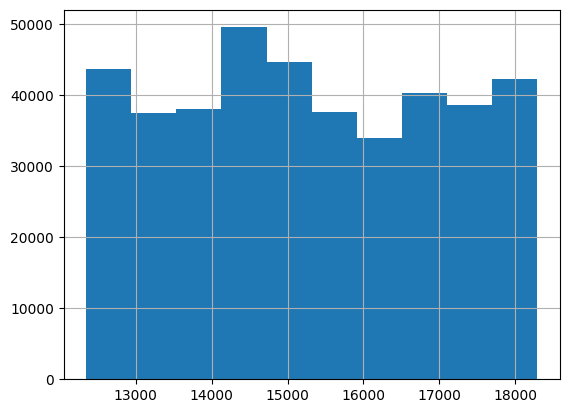

In [28]:
df['CustomerID'].hist()

<Axes: >

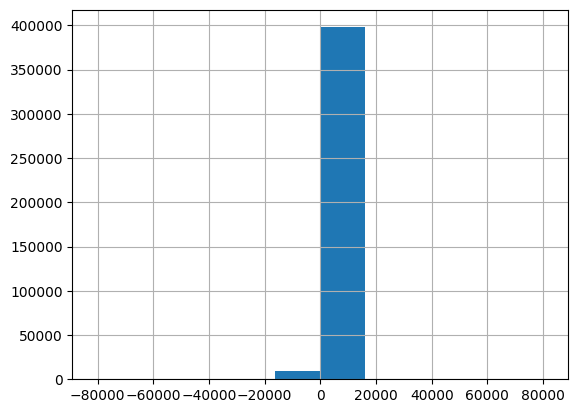

In [29]:
df['Quantity'].hist()

<Axes: >

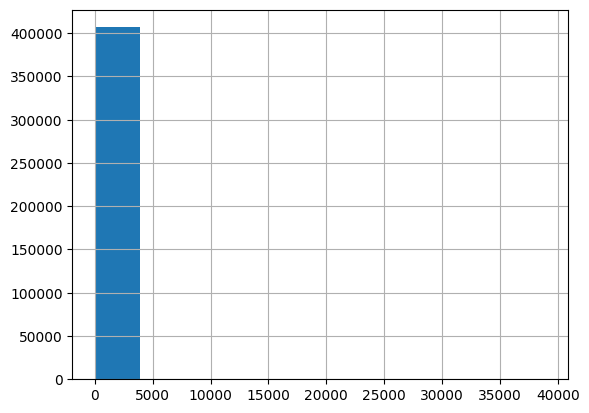

In [30]:
df['UnitPrice'].hist()

обратим внимание, что Quantity у некоторых продуктов меньше 0. Так как это признак показывает Количество каждого товара (наименования) в одной транзакции, то вероятно это отказ от товара. Нам же нужны данные которые были выкупленыи оставлены, поэтому отрицательные Quantity нужно убрать.

In [31]:
df[df['UnitPrice']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [32]:
df[df['Quantity']<0].shape

(8905, 8)

In [33]:
df[df['Quantity']>0].shape

(397924, 8)

In [34]:
df[df['Quantity']<0].shape[0]/df[df['Quantity']>0].shape[0]*100

2.237864516842412

Видим, что было произведено 8905 отказов. Что составляет 2.23 % от общего колчиества заказов.

In [35]:
df=df[df['Quantity']>0]

In [36]:
df.shape

(397924, 8)

In [37]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [38]:
df.duplicated().sum()

np.int64(5192)

Новый признак по сумме всего чека TotalPrice. А также введен колонку с датой, без времени.

In [39]:
df['TotalPrice']=df['Quantity']*df['UnitPrice']


In [40]:
df['Date']=df['InvoiceDate'].dt.date
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [41]:
df['CustomerID'].nunique()

4339

RFM-**анализ**

RFM-анализ — метод сегментации клиентов компании, основанный на трёх ключевых показателях потребительского поведения: Recency (давность), Frequency (частота) и Monetary (сумма покупок). Аббревиатура RFM расшифровывается как Recency, Frequency и Monetary.
Будем считать эту метрику для каждого пользователя.


Определим временя, возьмем максимальное из всей колонки +1 день.

In [42]:
import datetime as dt
date_now = df['InvoiceDate'].max()+dt.timedelta(days=1)
date_now

Timestamp('2011-12-10 12:50:00')

In [43]:
Recency=(date_now-df.groupby('CustomerID')['InvoiceDate'].max()).dt.days
Recency.head()

,InvoiceDate
CustomerID,
12346,326
12347,2
12348,75
12349,19
12350,310


Это мы просмотрели давность последней покупки каждого пользователя.

In [44]:
Frequency = df.groupby('CustomerID')['InvoiceDate'].nunique()
Frequency.head()

,InvoiceDate
CustomerID,
12346,1
12347,7
12348,4
12349,1
12350,1


Frequency (F): Общее количество заказов (уникальных чеков) у клиента

In [45]:
Monetary=df.groupby('CustomerID')['TotalPrice'].sum()
Monetary.head()

,TotalPrice
CustomerID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40


Monetary (M): Сумма всех покупок клиента.

In [166]:
rfm_df= pd.DataFrame({'Recency':Recency,'Frequency':Frequency, 'Monetary':Monetary}).reset_index()
rfm_df.head()


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40


In [167]:
rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.518322,4.250749,2053.793018
std,1721.889758,100.009747,7.642803,8988.248381
min,12346.000000,1.000000,1.000000,0.000000
25%,13812.500000,18.000000,1.000000,307.245000
50%,15299.000000,51.000000,2.000000,674.450000
75%,16778.500000,142.000000,5.000000,1661.640000
max,18287.000000,374.000000,211.000000,280206.020000


<Axes: >

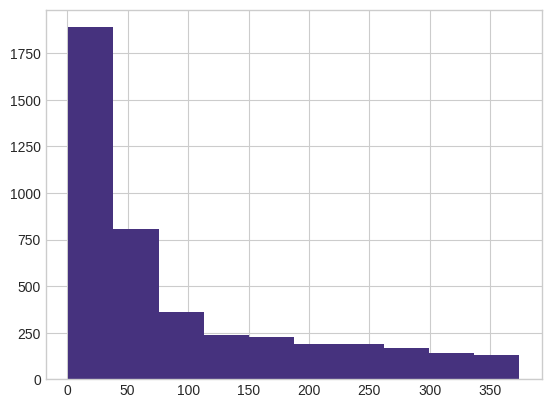

In [168]:
rfm_df['Recency'].hist()

<Axes: >

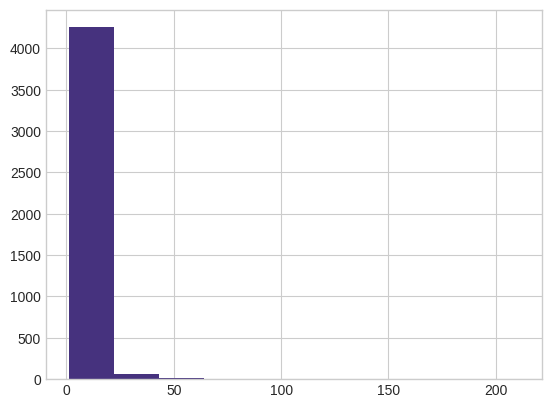

In [169]:
rfm_df['Frequency'].hist()

<Axes: >

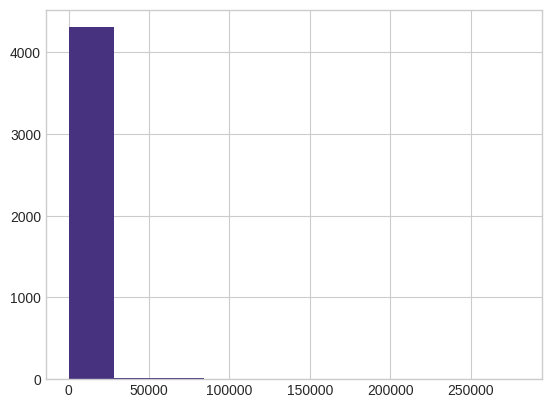

In [170]:
rfm_df['Monetary'].hist()

In [171]:
rfm_df['Monetary'].median()

674.45

In [172]:
rfm_df['Monetary'].max()

280206.02

In [173]:
rfm=rfm_df

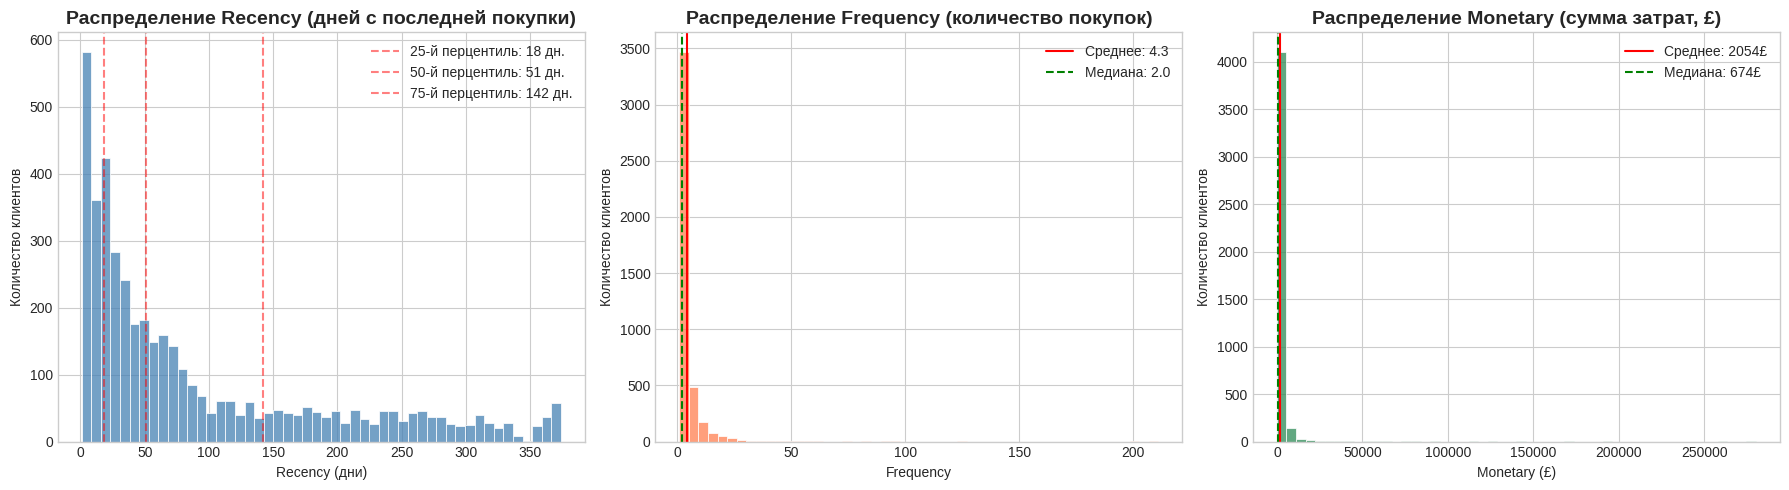

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Настраиваем стиль
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Создаем фигуру с тремя подграфиками
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Гистограмма Recency (давность покупки)
sns.histplot(data=rfm, x='Recency', bins=50, ax=axes[0], color='steelblue', edgecolor='white')
axes[0].set_title('Распределение Recency (дней с последней покупки)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Recency (дни)')
axes[0].set_ylabel('Количество клиентов')
# Добавим вертикальные линии для квантилей
for q in [0.25, 0.5, 0.75]:
    axes[0].axvline(rfm['Recency'].quantile(q), color='red', linestyle='--', alpha=0.5,
                   label=f'{int(q*100)}-й перцентиль: {int(rfm["Recency"].quantile(q))} дн.')
axes[0].legend()

# 2. Гистограмма Frequency (частота покупок) - скорее всего с длинным хвостом
sns.histplot(data=rfm, x='Frequency', bins=50, ax=axes[1], color='coral', edgecolor='white')
axes[1].set_title('Распределение Frequency (количество покупок)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Количество клиентов')
# Добавим статистику
mean_freq = rfm['Frequency'].mean()
median_freq = rfm['Frequency'].median()
axes[1].axvline(mean_freq, color='red', linestyle='-', label=f'Среднее: {mean_freq:.1f}')
axes[1].axvline(median_freq, color='green', linestyle='--', label=f'Медиана: {median_freq:.1f}')
axes[1].legend()

# 3. Гистограмма Monetary (сумма затрат)
sns.histplot(data=rfm, x='Monetary', bins=50, ax=axes[2], color='seagreen', edgecolor='white')
axes[2].set_title('Распределение Monetary (сумма затрат, £)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Monetary (£)')
axes[2].set_ylabel('Количество клиентов')
# Добавим статистику
mean_mon = rfm['Monetary'].mean()
median_mon = rfm['Monetary'].median()
axes[2].axvline(mean_mon, color='red', linestyle='-', label=f'Среднее: {mean_mon:.0f}£')
axes[2].axvline(median_mon, color='green', linestyle='--', label=f'Медиана: {median_mon:.0f}£')
axes[2].legend()

plt.savefig('rfm_data_hist.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

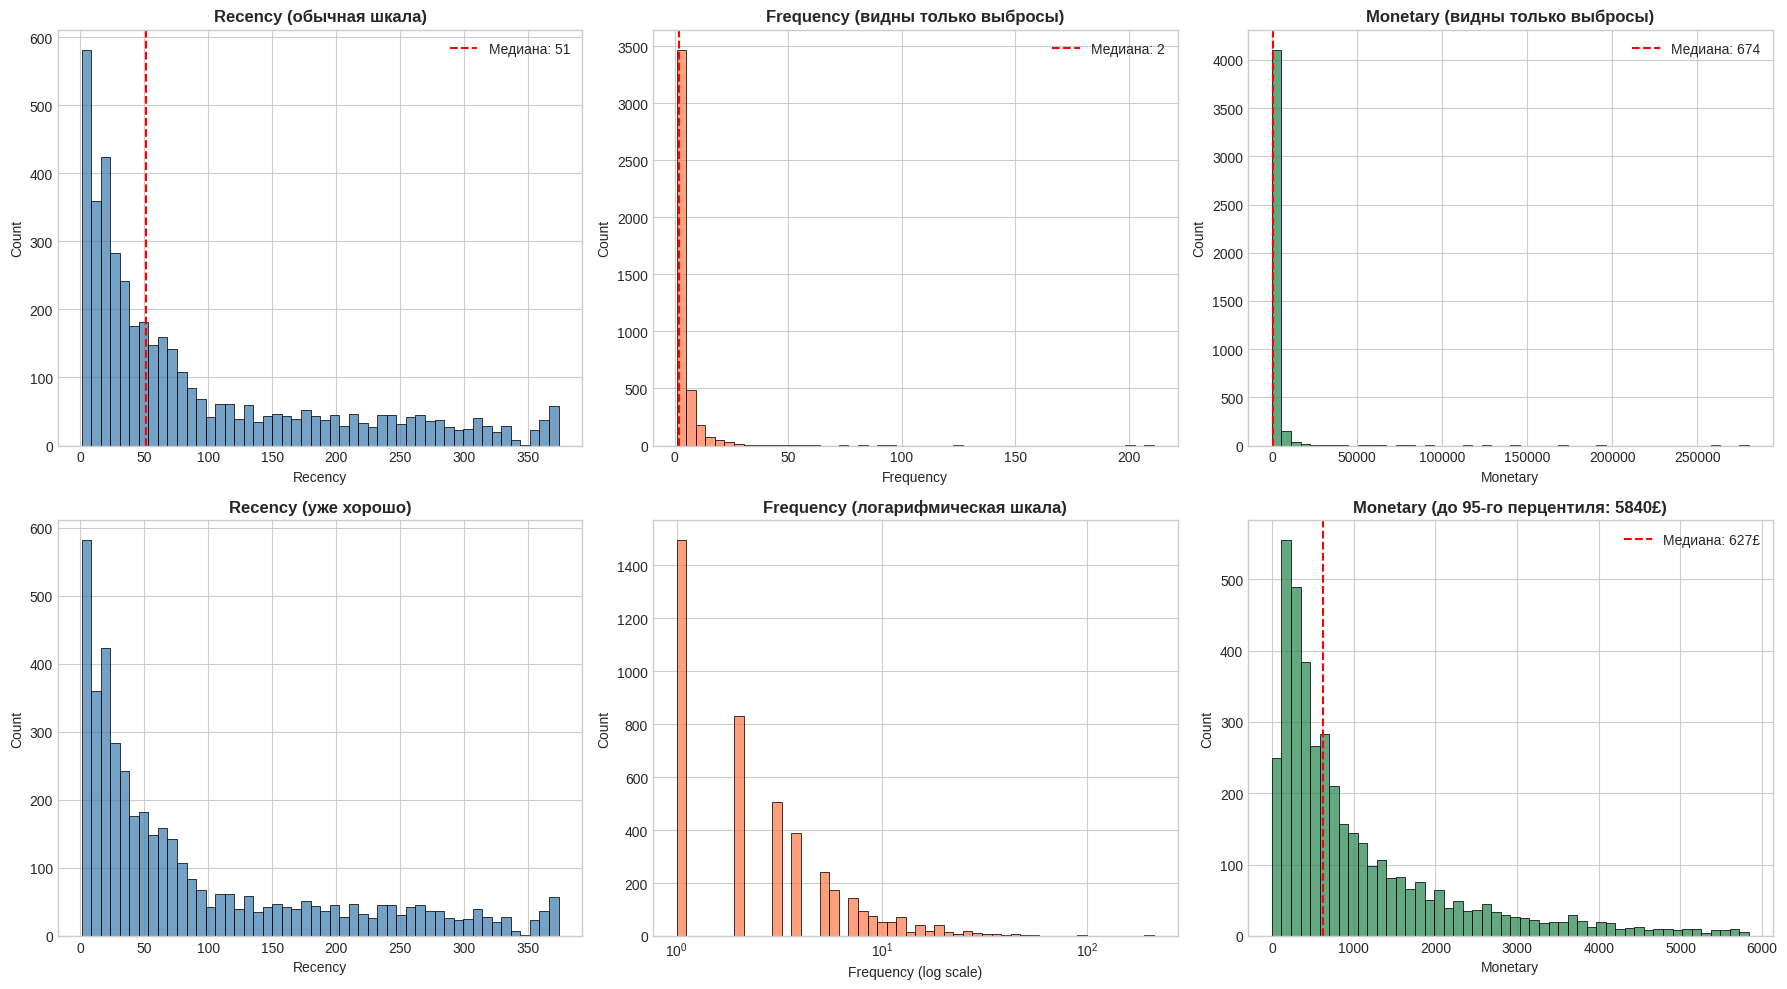

In [175]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Верхний ряд: Обычные гистограммы
# Recency (тут обычно нормальное распределение)
sns.histplot(data=rfm, x='Recency', bins=50, ax=axes[0,0], color='steelblue')
axes[0,0].set_title('Recency (обычная шкала)', fontweight='bold')
axes[0,0].axvline(rfm['Recency'].median(), color='red', linestyle='--', label=f'Медиана: {rfm["Recency"].median():.0f}')
axes[0,0].legend()

# Frequency (проблема - длинный хвост)
sns.histplot(data=rfm, x='Frequency', bins=50, ax=axes[0,1], color='coral')
axes[0,1].set_title('Frequency (видны только выбросы)', fontweight='bold')
axes[0,1].axvline(rfm['Frequency'].median(), color='red', linestyle='--', label=f'Медиана: {rfm["Frequency"].median():.0f}')
axes[0,1].legend()

# Monetary (та же проблема)
sns.histplot(data=rfm, x='Monetary', bins=50, ax=axes[0,2], color='seagreen')
axes[0,2].set_title('Monetary (видны только выбросы)', fontweight='bold')
axes[0,2].axvline(rfm['Monetary'].median(), color='red', linestyle='--', label=f'Медиана: {rfm["Monetary"].median():.0f}')
axes[0,2].legend()

# Нижний ряд: Решения проблемы
# 1. Recency - уже хорошо, оставим как есть
sns.histplot(data=rfm, x='Recency', bins=50, ax=axes[1,0], color='steelblue')
axes[1,0].set_title('Recency (уже хорошо)', fontweight='bold')

# 2. Frequency в логарифмической шкале
sns.histplot(data=rfm, x='Frequency', bins=50, ax=axes[1,1], color='coral', log_scale=True)
axes[1,1].set_title('Frequency (логарифмическая шкала)', fontweight='bold')
axes[1,1].set_xlabel('Frequency (log scale)')

# 3. Monetary с ограничением по x (первые 95% данных)
monetary_95 = rfm['Monetary'].quantile(0.95)
rfm_95 = rfm[rfm['Monetary'] <= monetary_95]
sns.histplot(data=rfm_95, x='Monetary', bins=50, ax=axes[1,2], color='seagreen')
axes[1,2].set_title(f'Monetary (до 95-го перцентиля: {monetary_95:.0f}£)', fontweight='bold')
axes[1,2].axvline(rfm_95['Monetary'].median(), color='red', linestyle='--',
                  label=f'Медиана: {rfm_95["Monetary"].median():.0f}£')
axes[1,2].legend()

plt.tight_layout()
plt.show()

 Анализ распределений RFM-метрик

1. Recency (давность последней покупки)
- **Форма распределения**: Умеренно правосторонняя асимметрия
- **Интерпретация**: Большинство клиентов (около 60%) совершали покупки в последние 100 дней
- **Медиана**: ~50 дней говорит о том, что половина клиентов активна в последние 2 месяца
- **Бизнес-вывод**: У нас хорошая удерживаемость, но есть "хвост" клиентов, которые не покупали больше года (нужна реактивация)

2. Frequency (частота покупок)
- **Форма распределения**: Сильная правосторонняя асимметрия (коэффициент > 5)
- **Проблема**: 80% клиентов совершили менее 10 покупок, но есть клиенты с > 100 покупками
- **Медиана (2) vs Среднее (4.3)**: Среднее в две раза выше медианы из-за выбросов
- **Бизнес-вывод**: Нужно фокусироваться на увеличении частоты покупок у массового сегмента

 3. Monetary (сумма затрат)
- **Форма распределения**: Крайне неравномерное (коэффициент вариации > 200%)
- **Правило Парето**:
  - Топ 20% клиентов дают ~80% выручки
  - Медианный клиент потратил всего 674.45
  - Средний чек сильно завышен из-за VIP-клиентов (280206.02 максимум)
- **Бизнес-вывод**: Необходима разная стратегия для массового и премиум-сегментов

Рекомендации по сегментации на основе распределений:

1. Для **Recency**: Использовать квантили (0-30, 31-60, 61-90, 91-180, 180+ дней)
2. Для **Frequency**: Логарифмические корзины из-за длинного хвоста
3. Для **Monetary**: Выделить премиум-сегмент (> 95-го перцентиля) в отдельную группу

Recency: Чем меньше дней прошло (ближе к сегодня), тем лучше. Ставим оценку 5 тем, кто покупал недавно.

Frequency: Чем больше заказов, тем лучше (5 — лучшие).

Monetary: Чем больше потратил, тем лучше (5 — лучшие).

In [176]:
rfm_df['R_rank']=pd.qcut(rfm_df['Recency'], q=5, labels=[5,4,3,2,1])
rfm_df['F_rank']=pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm_df['M_rank']=pd.qcut(rfm_df['Monetary'], q=5, labels=[1,2,3,4,5])
rfm_df['RFM_Score'] = rfm_df['R_rank'].astype(str) + rfm_df['F_rank'].astype(str) + rfm_df['M_rank'].astype(str)
rfm_df['Total_Score'] = rfm_df['R_rank'].astype(int) + rfm_df['F_rank'].astype(int) + rfm_df['M_rank'].astype(int)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,RFM_Score,Total_Score
0,12346,326,1,77183.60,1,1,5,115,7
1,12347,2,7,4310.00,5,5,5,555,15
2,12348,75,4,1797.24,2,4,4,244,10
3,12349,19,1,1757.55,4,1,4,414,9
4,12350,310,1,334.40,1,1,2,112,4


In [177]:
rfm_df.shape

(4339, 9)

In [178]:
rfm_df['Total_Score'].describe()

,Total_Score
count,4339.000000
mean,9.015672
std,3.590011
min,3.000000
25%,6.000000
50%,9.000000
75%,12.000000
max,15.000000


По таблице вы видим, что минимум это рейтинг пользователя 3, максимум 15

Преобразуем рейтинги отдельных признаков в числовые переменные


In [179]:
rfm_df['F_rank']=rfm_df['F_rank'].astype('int')
rfm_df['R_rank']=rfm_df['R_rank'].astype('int')
rfm_df['M_rank']=rfm_df['M_rank'].astype('int')

In [180]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   4339 non-null   int64  
 1   Recency      4339 non-null   int64  
 2   Frequency    4339 non-null   int64  
 3   Monetary     4339 non-null   float64
 4   R_rank       4339 non-null   int64  
 5   F_rank       4339 non-null   int64  
 6   M_rank       4339 non-null   int64  
 7   RFM_Score    4339 non-null   object 
 8   Total_Score  4339 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 305.2+ KB


<Axes: >

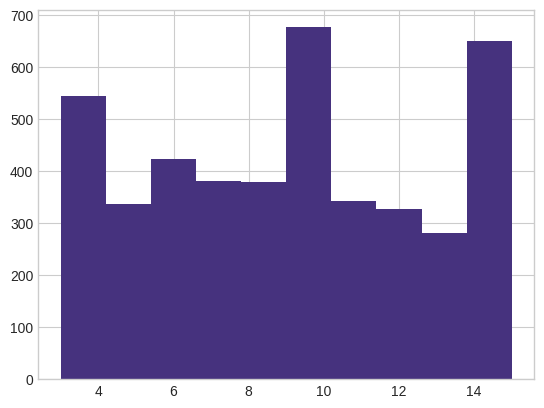

In [181]:
rfm_df['Total_Score'].hist()

VIP (Чемпионы): Счет 13-15 (в сумме) — часто покупают, много тратят.

Лояльные: Счет 10-12.

Потенциальные (Новички): Счет 8-9 (часто имеют высокий R, но низкие F и M).

Спящие (Риск потери): Счет 5-7.

Ушедшие: Счет 3-4.

Рассмотрим более подробно на категории, как внутри они распределяются между R, F and M.

  VIP (Чемпионы) Счет 13-15 (в сумме)

1.   Часто покупают, много тратят и относительно недавно делали последний заказ (живые клиенты)




array([[<Axes: title={'center': 'F_rank'}>,
        <Axes: title={'center': 'R_rank'}>],
       [<Axes: title={'center': 'M_rank'}>, <Axes: >]], dtype=object)

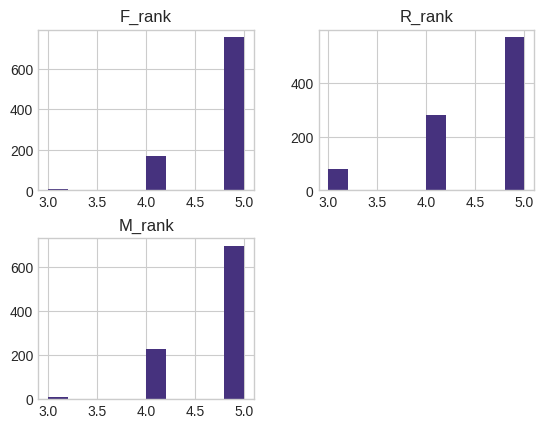

In [182]:
segm_1=rfm_df[(rfm_df['Total_Score']<=15) & (rfm_df['Total_Score']>=13)]['Total_Score']
segm_1
rfm_df[(rfm_df['Total_Score']<=15) & (rfm_df['Total_Score']>=13)][['F_rank','R_rank','M_rank']].hist()

Лояльные: Счет 10-12


1.   Заходили в последний раз позже, чем Вип-клиенты, менее чаще делают покупки, но хорошо выплачивают товар.




array([[<Axes: title={'center': 'F_rank'}>,
        <Axes: title={'center': 'R_rank'}>],
       [<Axes: title={'center': 'M_rank'}>, <Axes: >]], dtype=object)

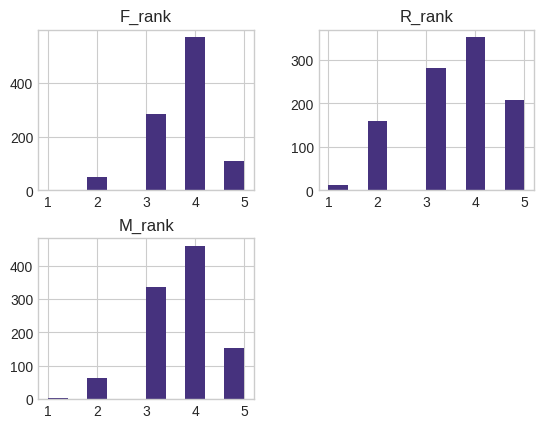

In [183]:
segm_2=rfm_df[(rfm_df['Total_Score']<=12) & (rfm_df['Total_Score']>=10)]['Total_Score']
rfm_df[(rfm_df['Total_Score']<=12) & (rfm_df['Total_Score']>=10)][['F_rank','R_rank','M_rank']].hist()

Потенциальные (Отдельные люди, готовящиеся к какому-либо празднику): Счет 8-9 \
Так как заходили давно на пике, заказывали умерено, скорее всего самое необходимое, и выплачивали тоже умерено.

array([[<Axes: title={'center': 'F_rank'}>,
        <Axes: title={'center': 'R_rank'}>],
       [<Axes: title={'center': 'M_rank'}>, <Axes: >]], dtype=object)

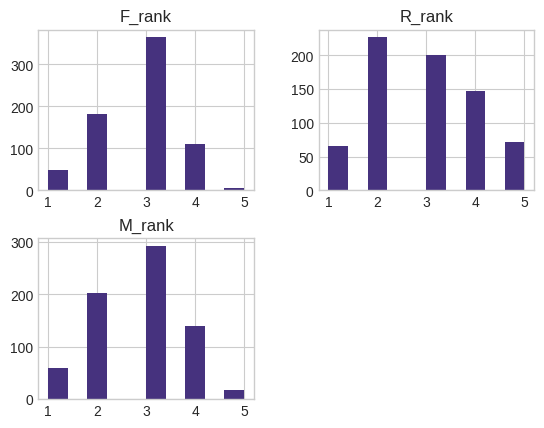

In [184]:
segm_3=rfm_df[(rfm_df['Total_Score']<=9) & (rfm_df['Total_Score']>=8)]['Total_Score']
rfm_df[(rfm_df['Total_Score']<=9) & (rfm_df['Total_Score']>=8)][['F_rank','R_rank','M_rank']].hist()

Спящие (Риск потери): Счет 5-7.
Заходили очень давно, заказы были не частые и приносили низкую прибыль. Вреоятно пользователи, которые опробывали сайт.

Предпринять решение для возобновления интереса к платформе, возможно предлагать более низкий по стоимости товар и на определнные события.

array([[<Axes: title={'center': 'F_rank'}>,
        <Axes: title={'center': 'R_rank'}>],
       [<Axes: title={'center': 'M_rank'}>, <Axes: >]], dtype=object)

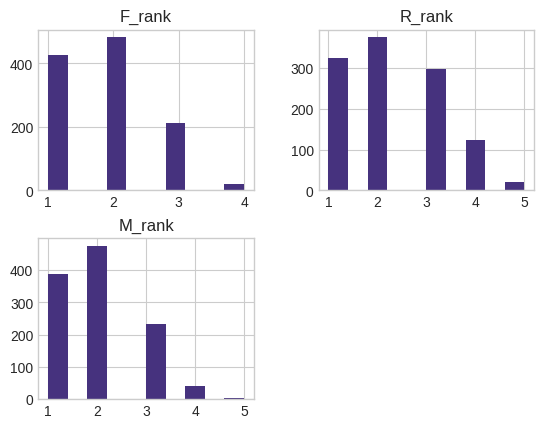

In [185]:
segm_4=rfm_df[(rfm_df['Total_Score']<=7) & (rfm_df['Total_Score']>=5)]['Total_Score']
rfm_df[(rfm_df['Total_Score']<=7) & (rfm_df['Total_Score']>=5)][['F_rank','R_rank','M_rank']].hist()

Ушедшие: Счет 3-4.
Неактивные пользователи платформы.

array([[<Axes: title={'center': 'F_rank'}>,
        <Axes: title={'center': 'R_rank'}>],
       [<Axes: title={'center': 'M_rank'}>, <Axes: >]], dtype=object)

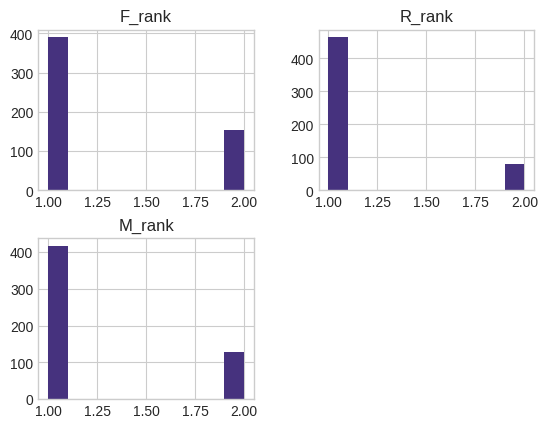

In [186]:
segm_5=rfm_df[(rfm_df['Total_Score']<=4) & (rfm_df['Total_Score']>=3)]['Total_Score']
rfm_df[(rfm_df['Total_Score']<=4) & (rfm_df['Total_Score']>=3)][['F_rank','R_rank','M_rank']].hist()


In [187]:
segment=pd.DataFrame({'segm_1':segm_1,'segm_2':segm_2,'segm_3':segm_3,'segm_4':segm_4,'segm_5':segm_5})
segment

,segm_1,segm_2,segm_3,segm_4,segm_5
0,NaN,NaN,NaN,7.0,NaN
1,15.0,NaN,NaN,NaN,NaN
2,NaN,10.0,NaN,NaN,NaN
3,NaN,NaN,9.0,NaN,NaN
4,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...
4334,NaN,NaN,NaN,NaN,4.0
4335,NaN,NaN,NaN,NaN,4.0
4336,NaN,NaN,9.0,NaN,NaN
4337,15.0,NaN,NaN,NaN,NaN


In [188]:
tabl_segm=segment.describe()

proc_segment= tabl_segm.T['count']/segment.shape[0]
proc_segment

,count
segm_1,0.214335
segm_2,0.233464
segm_3,0.163863
segm_4,0.262964
segm_5,0.125375


/tmp/ipython-input-159891597.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(description, fontsize=10)


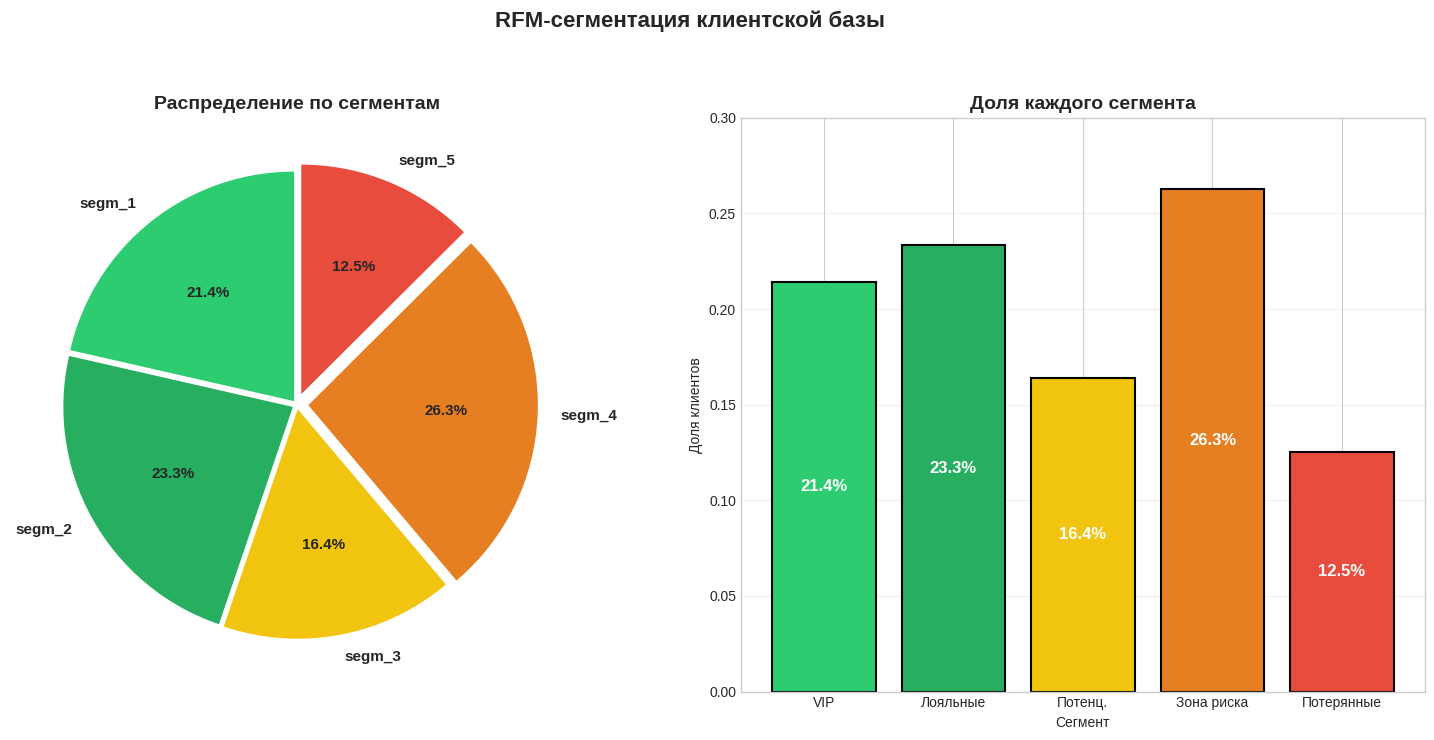

In [278]:
proc_segment = {
    'segm_1': 0.214335,
    'segm_2': 0.233464,
    'segm_3': 0.163863,
    'segm_4': 0.262964,
    'segm_5': 0.125375
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

colors = ['#2ecc71', '#27ae60', '#f1c40f', '#e67e22', '#e74c3c']

wedges, texts, autotexts = ax1.pie(
    proc_segment.values(),
    labels=proc_segment.keys(),
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=(0.02, 0.02, 0.02, 0.05, 0.05),
    textprops={'fontsize': 11, 'fontweight': 'bold'}
)
ax1.set_title('Распределение по сегментам', fontsize=14, fontweight='bold')


segments = list(proc_segment.keys())
values = list(proc_segment.values())

bars = ax2.bar(segments, values, color=colors, edgecolor='black', linewidth=1.5)

# Добавляем проценты
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{val*100:.1f}%', ha='center', va='center',
             fontsize=12, fontweight='bold', color='white')

ax2.set_title('Доля каждого сегмента', fontsize=14, fontweight='bold')
ax2.set_xlabel('Сегмент')
ax2.set_ylabel('Доля клиентов')
ax2.set_ylim(0, 0.3)
ax2.grid(True, alpha=0.3, axis='y')

description = ['VIP', 'Лояльные', 'Потенц.', 'Зона риска', 'Потерянные']
ax2.set_xticklabels(description, fontsize=10)

fig.suptitle('RFM-сегментация клиентской базы', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()

plt.savefig('segment_distribution_combined.png', dpi=300, bbox_inches='tight')
plt.show()

# Анализ сегментации клиентской базы

Проведена RFM-сегментация клиентов, в результате которой выделено 5 групп:

1. **segm_1 (21.4% клиентов)** — VIP-сегмент с максимальными оценками (13-15 баллов).
   Ядро лояльной аудитории, требует премиального обслуживания.

2. **segm_2 (23.3% клиентов)** — Лояльные покупатели с хорошими показателями (10-12 баллов).
   Стабильная основа бизнеса, потенциал для перевода в VIP.

3. **segm_3 (16.4% клиентов)** — Средний сегмент (8-9 баллов).
   Требуют внимания для повышения лояльности.

4. **segm_4 (26.3% клиентов)** — Группа риска (5-7 баллов).
   Самая многочисленная группа! Клиенты, которые могут уйти к конкурентам.

5. **segm_5 (12.5% клиентов)** — "Спящие" / Потерянные клиенты (3-4 балла).
   Минимальная активность, требуют реактивации или отключения от рассылок.

**Ключевой инсайт:** Почти 40% клиентской базы (segm_4 + segm_5) находятся в зоне риска или уже потеряны.
Это сигнал для пересмотра стратегии удержания.

Анализ самого большого сектора №4

In [191]:
seg_4_analiz=rfm_df[(rfm_df['Total_Score']<=7) & (rfm_df['Total_Score']>=5)]
seg_4_analiz

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,RFM_Score,Total_Score
0,12346,326,1,77183.60,1,1,5,115,7
7,12354,232,1,1079.40,1,1,4,114,6
16,12363,110,2,552.00,2,2,3,223,7
18,12365,291,2,641.38,1,2,3,123,6
19,12367,4,1,168.90,5,1,1,511,7
...,...,...,...,...,...,...,...,...,...
4325,18268,134,1,25.50,2,2,1,221,5
4330,18274,30,1,175.92,4,2,1,421,7
4331,18276,44,1,335.86,3,2,2,322,7
4332,18277,58,1,110.38,3,2,1,321,6


In [253]:
seg_4_analiz.groupby('R_rank').count()

,CustomerID,Recency,Frequency,Monetary,F_rank,M_rank,RFM_Score,Total_Score
R_rank,,,,,,,,
1,324,324,324,324,324,324,324,324
2,376,376,376,376,376,376,376,376
3,297,297,297,297,297,297,297,297
4,124,124,124,124,124,124,124,124
5,20,20,20,20,20,20,20,20


<Axes: >

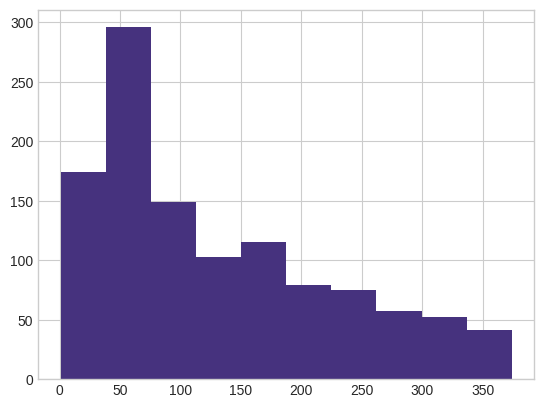

In [254]:
seg_4_analiz['Recency'].hist()

<Axes: >

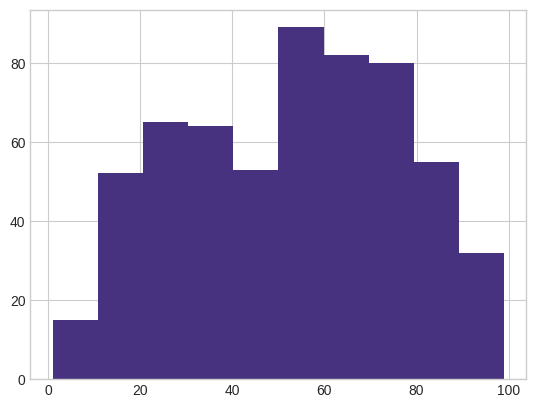

In [199]:
seg_4_analiz[seg_4_analiz['Recency']<100]['Recency'].hist()

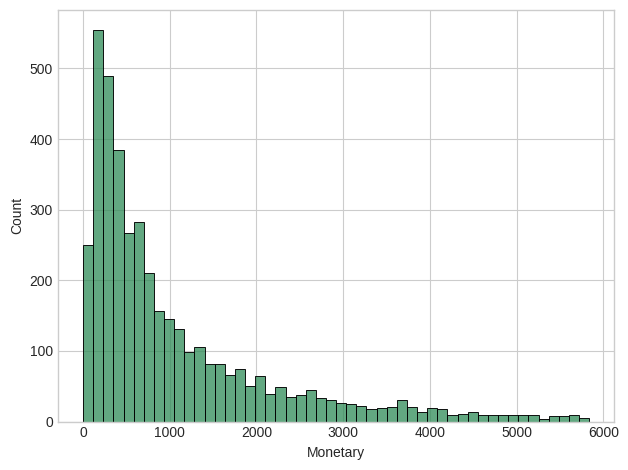

In [226]:
monetary_95 = rfm['Monetary'].quantile(0.95)
rfm_95 = rfm[rfm['Monetary'] <= monetary_95]
sns.histplot(data=rfm_95, x='Monetary', bins=50, color='seagreen')
axes[1,2].set_title(f'Monetary (до 95-го перцентиля: {monetary_95:.0f}£)', fontweight='bold')
axes[1,2].axvline(rfm_95['Monetary'].median(), color='red', linestyle='--',
                  label=f'Медиана: {rfm_95["Monetary"].median():.0f}£')
axes[1,2].legend()

plt.tight_layout()
plt.show()


<Axes: >

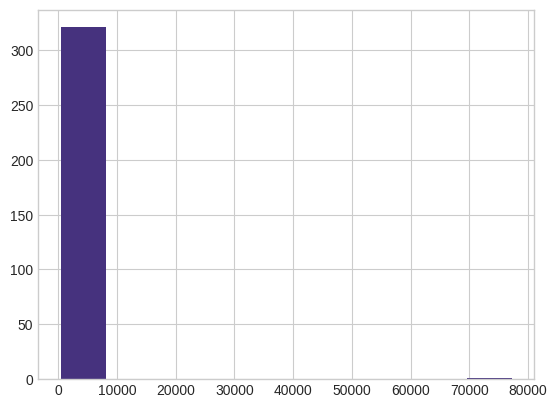

In [217]:

seg_4_analiz[seg_4_analiz['Monetary']>450]['Monetary'].hist()

Text(0.5, 24.0, 'Frequency (log scale)')

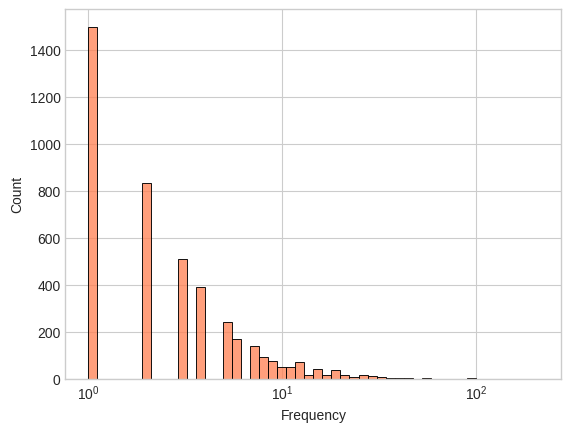

In [228]:
sns.histplot(data=rfm, x='Frequency', bins=50, color='coral', log_scale=True)
axes[1,1].set_title('Frequency (логарифмическая шкала)', fontweight='bold')
axes[1,1].set_xlabel('Frequency (log scale)')

Можно заметить, что пользователи такого сегмента заходли на сайт достаточно давно, а назад, в среднем тратя 500 рублей, частота заказа самая частая 1 либо от 30-50.
Можно сделать вывод, что это пользователи покупали подарок на какой-то праздник, поэтому происходит такой всплеск в определенное время. Проверим.

In [229]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [237]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
 9   Date         397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 33.4+ MB


In [246]:
df.shape

(397924, 10)

In [231]:
seg_4_analiz.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,RFM_Score,Total_Score
0,12346,326,1,77183.60,1,1,5,115,7
7,12354,232,1,1079.40,1,1,4,114,6
16,12363,110,2,552.00,2,2,3,223,7
18,12365,291,2,641.38,1,2,3,123,6
19,12367,4,1,168.90,5,1,1,511,7


In [238]:
seg_4_analiz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1141 entries, 0 to 4333
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   1141 non-null   int64  
 1   Recency      1141 non-null   int64  
 2   Frequency    1141 non-null   int64  
 3   Monetary     1141 non-null   float64
 4   R_rank       1141 non-null   int64  
 5   F_rank       1141 non-null   int64  
 6   M_rank       1141 non-null   int64  
 7   RFM_Score    1141 non-null   object 
 8   Total_Score  1141 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 89.1+ KB


In [245]:
seg_4_analiz.shape

(1141, 9)

In [250]:
df_merged_seg_4 = df.merge(seg_4_analiz, on='CustomerID', how='right', suffixes=('', '_seg'))
df_merged_seg_4.shape

(29316, 18)

In [251]:
df_merged_seg_4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,RFM_Score,Total_Score
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6,2011-01-18,326,1,77183.6,1,1,5,115,7
1,550911,23201,JUMBO BAG ALPHABET,10,2011-04-21 13:11:00,2.08,12354,Spain,20.8,2011-04-21,232,1,1079.4,1,1,4,114,6
2,550911,23204,CHARLOTTE BAG APPLES DESIGN,10,2011-04-21 13:11:00,0.85,12354,Spain,8.5,2011-04-21,232,1,1079.4,1,1,4,114,6
3,550911,23205,CHARLOTTE BAG VINTAGE ALPHABET,10,2011-04-21 13:11:00,0.85,12354,Spain,8.5,2011-04-21,232,1,1079.4,1,1,4,114,6
4,550911,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-04-21 13:11:00,4.15,12354,Spain,16.6,2011-04-21,232,1,1079.4,1,1,4,114,6


<Axes: >

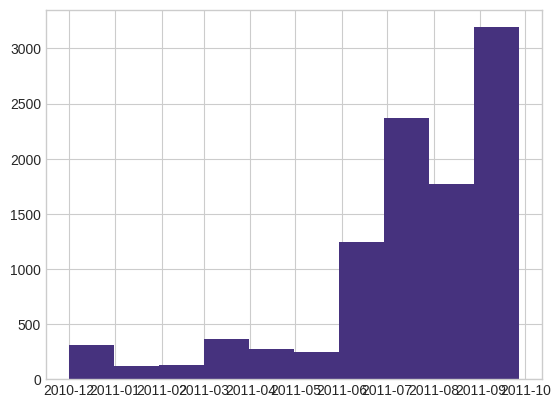

In [255]:
df_merged_seg_4[df_merged_seg_4['R_rank']==2]['Date'].hist()

То есть можно сделать вывод, что пользователи, которые заходили на сайт с рейтингом 2 по Recency, выбирали товар начиная с лета и пик приходил середину осени.

In [262]:
df_merged_seg_4[df_merged_seg_4['R_rank']==2].groupby('Description')['R_rank'].count().sort_values(ascending=False).head(5)

,R_rank
Description,
WHITE HANGING HEART T-LIGHT HOLDER,50
PARTY BUNTING,46
REGENCY CAKESTAND 3 TIER,43
SPOTTY BUNTING,41
SET OF 3 CAKE TINS PANTRY DESIGN,40


Люди чаще всего заказывали именно гирдянды, предположительно к новому году, это обосновывает теорию о пике продаж клиентам сегмента 4 приходящегося на срежину осени.

### Сезонный анализ поведения клиентов сегмента 4

На основе анализа данных выявлена четкая сезонная закономерность:

1. **Временной паттерн:**
   - Пользователи с рейтингом Recency = 2 (покупка 30-60 дней назад) проявляли активность начиная с летних месяцев
   - Пик активности приходится на **середину осени** (сентябрь-октябрь)
   - Это указывает на заблаговременное планирование праздничных закупок

2. **Товарные предпочтения:**
   Анализ наиболее популярных товаров в сегменте 4 показывает явную праздничную направленность:

   | Товар | Количество заказов |
   |-------|-------------------|
   | БЕЛАЯ ПОДВЕСНАЯ ГИРЛЯНДА В ВИДЕ СЕРДЕЧКА | 50 |
   | ПРАЗДНИЧНАЯ ГИРЛЯНДА | 46 |
   | ПОДСТАВКА ДЛЯ ТОРТОВ В СТИЛЕ РЕГЕНТСТВА, 3 ЯРУСА | 43 |
   | РАЗНОЦВЕТНАЯ ГИРЛЯНДА | 41 |
   | НАБОР ИЗ 3 ФОРМОЧЕК ДЛЯ ТОРТОВ PANTRY DESIGN | 40 |

3. **Ключевой инсайт:**
   Популярность гирлянд (три позиции в топ-5) и товаров для выпечки/тортов подтверждает гипотезу о **подготовке к новогодним праздникам**.
   
   Пик продаж в середине осени объясняется:
   - Заблаговременным планированием праздничного декора
   - Началом сезона домашних праздников (дни рождения, осенние праздники)
   - Подготовкой к Новому году (оптовые закупки декора)

Получается портрет 'дальновидного покупателя' — человека, который планирует праздники заранее и закупает декор за 2-3 месяца. Для бизнеса это ценный инсайт: нужно увеличивать запасы гирлянд к августу и запускать маркетинговые кампании с июля, чтобы захватить этот спрос.

**Визуализация**

In [78]:
popul_tovar=df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).reset_index().head(10)
popul_tovar

,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,77916
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
3,JUMBO BAG RED RETROSPOT,46181
4,WHITE HANGING HEART T-LIGHT HOLDER,36725
5,ASSORTED COLOUR BIRD ORNAMENT,35362
6,PACK OF 72 RETROSPOT CAKE CASES,33693
7,POPCORN HOLDER,30931
8,RABBIT NIGHT LIGHT,27202
9,MINI PAINT SET VINTAGE,26076


<BarContainer object of 10 artists>

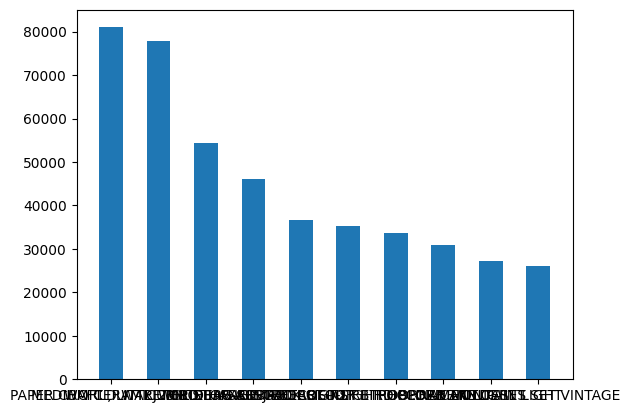

In [91]:
plt.bar(popul_tovar['Description'], height=popul_tovar['Quantity'],width=0.5 )

Самый продаваемый продукт PAPER CRAFT , LITTLE BIRDIE	 и MEDIUM CERAMIC TOP STORAGE JAR

In [272]:
import numpy as np

# Задаем условия для сегментов
conditions = [
    (rfm_df['Total_Score'] >= 13),  # Чемпионы/VIP
    (rfm_df['Total_Score'] >= 10) & (rfm_df['Total_Score'] <= 12),  # Лояльные
    (rfm_df['Total_Score'] >= 7) & (rfm_df['Total_Score'] <= 9),   # Потенциальные
    (rfm_df['Total_Score'] >= 4) & (rfm_df['Total_Score'] <= 6),   # Спящие
    (rfm_df['Total_Score'] <= 3)   # Ушедшие
]

# Соответствующие названия сегментов
choices = ['Чемпионы', 'Лояльные', 'Потенциальные', 'Спящие', 'Ушедшие']

# Создаем колонку segment
rfm_df['segment'] = np.select(conditions, choices, default='Не определен')

# Проверим распределение
print(rfm_df['segment'].value_counts())
print("\nПримеры по сегментам:")
print(rfm_df.groupby('segment')[['Recency', 'Frequency', 'Monetary']].mean())

segment
Спящие           1122
Потенциальные    1092
Лояльные         1013
Чемпионы          930
Ушедшие           182
Name: count, dtype: int64

Примеры по сегментам:
                  Recency  Frequency     Monetary
segment                                          
Лояльные        43.575518   3.861797  1402.313831
Потенциальные   85.398352   2.007326   805.484947
Спящие         176.706774   1.157754   301.623798
Ушедшие        287.159341   1.000000   145.160769
Чемпионы        14.529032  11.676344  6716.594914


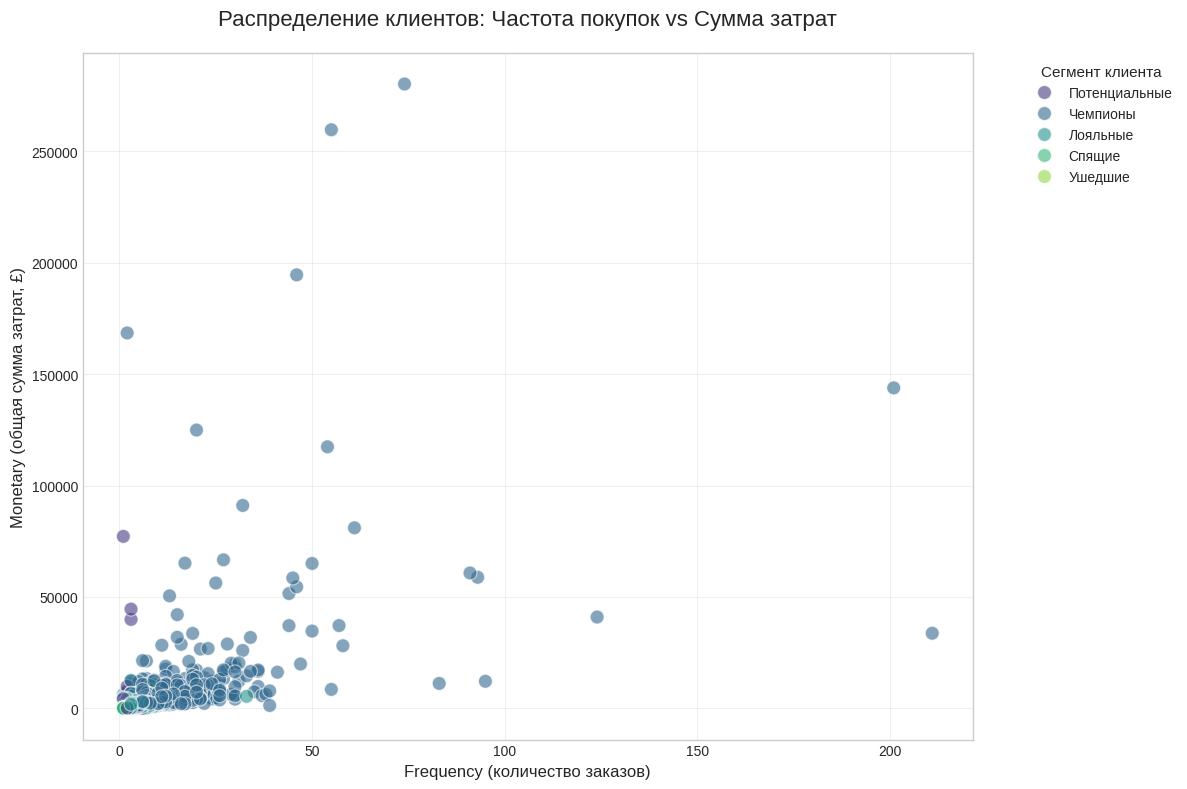

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем фигуру
plt.figure(figsize=(12, 8))

# Строим scatter plot
sns.scatterplot(
    data=rfm_df,
    x='Frequency',
    y='Monetary',
    hue='segment',  # раскрашиваем по сегментам
    palette='viridis',  # цветовая палитра (можно 'Set1', 'coolwarm', 'tab10')
    alpha=0.6,  # прозрачность для лучшей читаемости
    s=100  # размер точек

)

# Настройка осей (важно для Monetary - там большие значения)
plt.title('Распределение клиентов: Частота покупок vs Сумма затрат', fontsize=16, pad=20)
plt.xlabel('Frequency (количество заказов)', fontsize=12)
plt.ylabel('Monetary (общая сумма затрат, £)', fontsize=12)

# Легенда
plt.legend(title='Сегмент клиента', title_fontsize=11, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Сетка для лучшей читаемости
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('rfm_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

## ИТОГОВЫЕ РЕКОМЕНДАЦИИ ДЛЯ БИЗНЕСА:

1. **Сегмент 4 (26.3% клиентов)** — фокус на реактивацию:
   - Увеличить запасы гирлянд к августу
   - Запустить кампанию "Раннее бронирование" в июле-августе
   - Предлагать наборы "Все для праздника"

2. **Сегмент 1 (21.4% клиентов)** — программа лояльности:
   - Персональный менеджер
   - Эксклюзивные предложения

3. **Сегмент 5 (12.5% клиентов)** — тестирование скидок для возврата